* Get files
    * Transformable ItemList
* Split to training set, validation Set
    * by Random %, Folder name, CSV, ...
* Label
    * Folder name, File name, CSV, ...
* Transform per Image (optional)
* Transform per Tensor
* DataLoader to Batch
* Transform per Batch
* DataBunch combine Training Set, Validation Set
* Add Test Set (Optional

# 0. Magic Commands


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy


# 2. ข้อมูล

ใช้ชุดข้อมูล Imagenette 160

In [77]:
path = untar_data(URLs.IMAGENETTE_160)
path

PosixPath('/root/.fastai/data/imagenette-160')

In [0]:
import PIL, os, mimetypes
Path.ls = lambda x : list(x.iterdir())

In [79]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette-160/train'),
 PosixPath('/root/.fastai/data/imagenette-160/val')]

In [80]:
(path/'val').ls()

[PosixPath('/root/.fastai/data/imagenette-160/val/n02102040'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03888257'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03028079'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03417042'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n02979186'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03445777'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03425413'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03000684'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03394916')]

In [0]:
path_tench = path/'val'/'n01440764'

In [82]:
img_fn = path_tench.ls()[0]
img_fn

PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00009346.JPEG')

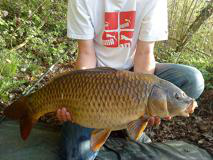

In [83]:
img = PIL.Image.open(img_fn)
img

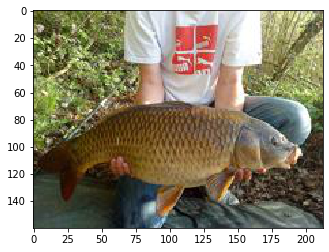

In [84]:
plt.imshow(img)

In [0]:
import numpy as np

In [0]:
imga = np.array(img)

In [87]:
imga.shape

(160, 213, 3)

In [88]:
imga[:10, :10, 0]

array([[116, 130, 118,  90, ...,  94, 142, 143, 128],
       [110, 109, 101,  94, ...,  73,  93, 128, 121],
       [125, 118, 102,  85, ...,  86,  84,  91,  96],
       [120, 127, 117,  80, ..., 113, 104, 114, 101],
       ...,
       [ 92,  81,  61,  80, ...,  66,  79,  82,  75],
       [ 86, 114,  99,  94, ...,  73,  67,  87,  33],
       [125,  71,  88,  64, ...,  94,  56,  96,  57],
       [110, 109,  82,  71, ...,  39,  72,  85,  69]], dtype=uint8)

# 3. Get Files

In [0]:
image_extensions = set(k for k, v in mimetypes.types_map.items() if v.startswith('image/'))

In [90]:
' '.join(image_extensions)

'.psd .gif .rgb .png .djvu .pbm .cpt .pat .bmp .erf .djv .pgm .jpf .ico .pcx .pnm .cr2 .jpeg .xwd .cdt .orf .tif .ppm .ief .jp2 .nef .jpx .cdr .wbmp .jpe .svgz .jpm .ras .xbm .crw .svg .jpg .xpm .jng .jpg2 .tiff .art'

In [0]:
def setify(o): return o if isinstance(o, set) else set(listify(o))

1 directory

In [0]:
def _get_files(p, fns, extensions=None):
    p = Path(p)
    res = [p/fn for fn in fns if not fn.startswith('.')
        and ((not extensions) or f'.{fn.split(".")[-1].lower()}' in extensions)]
    return res

In [93]:
t = [o.name for o in os.scandir(path_tench)]
t = _get_files(path_tench, t, extensions=image_extensions)
t[:5]

[PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00009346.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00045880.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00030740.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00046499.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00040833.JPEG')]

recursive

In [0]:
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}

    if recurse:
        res = []
        for i, (p, d, f) in enumerate(os.walk(path)): # dirpath, dirnames, filenames
            if include is not None and i==0:    d[:] = [o for o in d if o in include]
            else:                               d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        fns = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, fns, extensions)


In [95]:
get_files(path_tench, image_extensions)[:5]

[PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00009346.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00045880.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00030740.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00046499.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00040833.JPEG')]

In [96]:
get_files(path, image_extensions, recurse=True)[100:110]

[PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_2595.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_3610.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_4851.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_5167.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_7555.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_7629.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1181.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_2034.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_5666.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_3160.JPEG')]

In [97]:
all_fns = get_files(path, image_extensions, recurse=True)
len(all_fns)

13394

In [98]:
%timeit -n 10 get_files(path, image_extensions, recurse=True)

10 loops, best of 3: 73.5 ms per loop


## 3.1 ItemList

In [0]:
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x

In [0]:
class ListContainer():
    def __init__(self, items): self.items = listify(items)
    def __getitem__(self, idx): 
        if isinstance(idx, (int, slice)): return self.items[idx]
        if isinstance(idx[0], bool):
            assert len(idx) == len(self) # boolean mask
            return [o for m, o in zip(idx, self.items) if m]
        return [self.items[i] for i in idx]
    def __len__(self): return len(self.items)
    def __iter__(self): return iter(self.items)
    def __setitem__(self, i, o): self.items[i] = o
    def __delitem__(self, i): del(self.items[i])
    def __repr__(self):
        res = f'{self.__class__.__name__} ({len(self)} items)\n{self.items[:10]}'
        if len(self) > 10: res = res[:-1] + '...]'
        return res
     
class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path, self.tfms = Path(path), tfms

    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'

    def new(self, items, cls=None):
        if cls is None: cls = self.__class__
        return cls(items, self.path, self.tfms)

    def  get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)

    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res, list): return [self._get(o) for o in res]
        return self._get(res)

class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    
    def get(self, fn): return PIL.Image.open(fn)


In [0]:
class Transform(): _order = 0

class MakeRGB(Transform): 
    def __call__(self, item): return item.convert('RGB')

def make_rgb(item): return item.convert('RGB')

In [102]:
il = ImageList.from_files(path, tfms=make_rgb)
il

ImageList (13394 items)
[PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1091.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_2823.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_6354.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_7789.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_3628.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1486.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1147.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_3012.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_551.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_7067.JPEG')...]
Path: /root/.fastai/data/imagenette-160

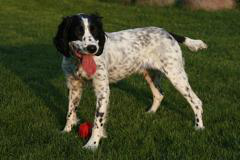

In [103]:
img = il[0]; img

In [104]:
il[:1]

[<PIL.Image.Image image mode=RGB size=240x160 at 0x7F0D39304F28>]

# 4. Split to Training Set, Validation Set

In [105]:
fn = il.items[0]; fn

PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1091.JPEG')

In [106]:
fn.parent.parent.name

'train'

In [0]:
def grandparent_splitter(fn, valid_name='valid', train_name='train'):
    gp = fn.parent.parent.name
    return True if gp == valid_name else False if gp == train_name else None

def split_by_func(items, f):
    mask = [f(o) for o in items]
    # filter out None value
    f = [o for o, m in zip(items, mask) if m == False]
    t = [o for o, m in zip(items, mask) if m == True]
    return f, t

In [0]:
splitter = partial(grandparent_splitter, valid_name='val')

In [109]:
% time train, valid = split_by_func(il, splitter)

CPU times: user 36.4 ms, sys: 1.03 ms, total: 37.4 ms
Wall time: 39 ms


In [110]:
len(train), len(valid)

(12894, 500)

In [0]:
class SplitData():
    def __init__(self, train, valid): self.train, self.valid = train, valid

    def __getattr__(self, k): return getattr(train, k)

    # for pickle to save / load data
    def __setstate__(self, data:Any): self.__dict__.update(data)

    @classmethod
    def split_by_func(cls, il, f):
        lists = map(il.new, split_by_func(il.items, f))
        return cls(*lists)

    def __repr__(self): return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'


In [112]:
sd = SplitData.split_by_func(il, splitter)
sd

SplitData
Train: ImageList (12894 items)
[PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1091.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_2823.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_6354.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_7789.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_3628.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1486.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1147.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_3012.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_551.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_7067.JPEG')...]
Path: /root/.fastai/data/imagenette-160
Valid: ImageList (500 items)
[PosixPath('/root/.fastai/data/imagenette-160/v

# 5. Label

ต้องทำหลังจาก Split เนื่องจาก Validation Set ต้อง ใช้ข้อมูลจาก Training Set ในการ Label

In [0]:
from collections import OrderedDict

def uniqueify(x, sort=False):
    res = list(OrderedDict.fromkeys(x).keys())
    if sort: res.sort()
    return res
    

In [0]:
class Processor():
    def process(self, items): return items

class CategoryProcessor(Processor):
    def __init__(self): self.vocab = None

    def __call__(self, items):
        if self.vocab is None: 
            self.vocab = uniqueify(items)
            self.otoi = {v: k for k, v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    def proc1(self, item): return self.otoi[item]

    def deprocess(self, idxs):
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    def deproc1(self, idx): return self.vocab[idx]

In [0]:
def parent_labeler(fn): return fn.parent.name

def _label_by_func(ds, f, cls=ItemList): return cls([f(o) for o in ds.items], path=ds.path)

class LabeledData():
    def process(self, il, proc): return il.new(compose(il.items, proc))

    def __init__(self, x, y, proc_x=None, proc_y=None):
        self.x, self.y = self.process(x, proc_x), self.process(y, proc_y)
        self.proc_x, self.proc_y = proc_x, proc_y

    def __repr__(self): return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    def __getitem__(self, idx):  return self.x[idx], self.y[idx]
    def __len__(self): return len(self.x)

    def x_obj(self, idx): return self.obj(self.x, idx, self.proc_x)
    def y_obj(self, idx): return self.obj(self.y, idx, self.proc_y)

    def obj(self, items, idx, procs):
        isint = isinstance(idx, int) or (isinstance(idx, torch.LongTensor) and not idx.ndim)
        item = items[idx]
        for proc in reversed(listify(procs)):
            item = proc.deproc1(item) if isint else proc.deprocess(item)
        return item
    
    @classmethod
    def label_by_func(cls, il, f, proc_x=None, proc_y=None):
        return cls(il, _label_by_func(il, f), proc_x=proc_x, proc_y=proc_y)

def label_by_func(sd, f, proc_x=None, proc_y=None):
    train = LabeledData.label_by_func(sd.train, f, proc_x, proc_y)
    valid = LabeledData.label_by_func(sd.valid, f, proc_x, proc_y)
    return SplitData(train, valid)


In [0]:
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())

In [0]:
assert ll.train.proc_y is ll.valid.proc_y

In [126]:
ll.train.y

ItemList (12894 items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0...]
Path: /root/.fastai/data/imagenette-160

In [127]:
ll.train.y.items[0], ll.train.y_obj(0), ll.train.y_obj(slice(2))

(0, 'n02102040', ['n02102040', 'n02102040'])

In [123]:
ll

SplitData
Train: LabeledData
x: ImageList (12894 items)
[PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1091.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_2823.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_6354.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_7789.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_3628.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1486.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_1147.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_3012.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_551.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n02102040/n02102040_7067.JPEG')...]
Path: /root/.fastai/data/imagenette-160
y: ItemList (12894 items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0...]
P

# 6. Transform to Tensor